My "Artistic Filter" project

Description of code working:                                                 
1)Ask user to upload an image. {they want to apply filter own}               
2)Provide user menu.                                                                   
3)Provide 3 different filters to be applied on your original image.

 Image uploaded successfully!
Choose filter to apply:
1: Cartoon
2: Sketch
3: Oil Paint
Enter your choice (1/2/3): 1


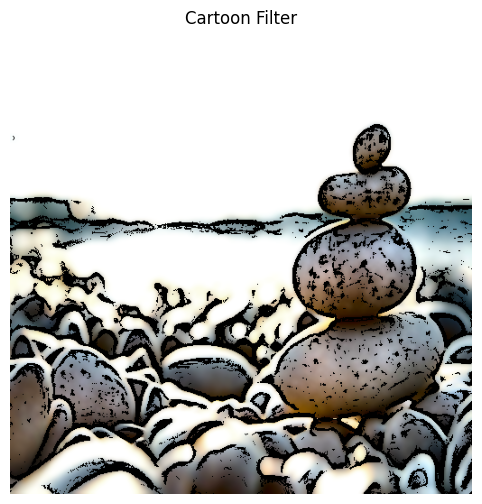

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import clear_output

uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn

def preprocess(img):
    img = cv2.resize(img, (512, 512))
    img = cv2.convertScaleAbs(img, alpha=1.2, beta=10)
    return img

def enhance(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def cartoonize(img):
    color = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, 7)
    edges = cv2.adaptiveThreshold(gray_blur, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 3)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon


def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inv = 255 - gray
    blur = cv2.GaussianBlur(inv, (21, 21), 0)
    sketch = cv2.divide(gray, 255 - blur, scale=256.0)
    return cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)


def oil_paint(img):
    try:
        return cv2.xphoto.oilPainting(img, 7, 1)
    except:
        print(" Packages not installed for oil filter. Using alternative method.")
        return cv2.stylization(img, sigma_s=60, sigma_r=0.45)


img = cv2.imread(image_path)
if img is None:
    print(" Image not found.")
else:
    img = preprocess(img)
    img = enhance(img)


    clear_output()
    print(" Image uploaded successfully!")
    print("Choose filter to apply:")
    print("1: Cartoon")
    print("2: Sketch")
    print("3: Oil Paint")

    choice = input("Enter your choice (1/2/3): ")

    if choice == '1':
        result = cartoonize(img)
        title = "Cartoon Filter"
    elif choice == '2':
        result = pencil_sketch(img)
        title = "Sketch Filter"
    elif choice == '3':
        result = oil_paint(img)
        title = "Oil Paint Filter"
    else:
        print("❌ Invalid choice. Showing original image.")
        result = img
        title = "Original"


    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
